In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
df = pd.read_csv("../data/us_accidents_sampled_cleaned.csv")
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,County,State,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in)
0,2,2022-12-03 23:37:14,2022-12-04 01:56:53,38.990562,-77.399070,38.990037,-77.398282,0.056,Sterling,Loudoun,VA,US/Eastern,45.0,43.0,48.0,29.91,10.0,W,5.0,0.00
1,2,2022-08-20 13:13:00,2022-08-20 15:22:45,34.661189,-120.492822,34.661189,-120.492442,0.022,Lompoc,Santa Barbara,CA,US/Pacific,68.0,68.0,73.0,29.79,10.0,W,13.0,0.00
2,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,Austin,Mower,MN,US/Central,27.0,15.0,86.0,28.49,10.0,ENE,15.0,0.00
3,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,Bakersfield,Kern,CA,US/Pacific,42.0,42.0,34.0,29.77,10.0,CALM,0.0,0.00
4,2,2020-01-14 16:49:23,2020-01-14 20:49:23,42.421280,-123.119450,42.421280,-123.119450,0.000,Gold Hill,Jackson,OR,US/Pacific,35.0,35.0,89.0,28.71,10.0,CALM,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232110,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,45.520225,-123.084211,0.158,Forest Grove,Washington,OR,US/Pacific,40.0,32.0,77.0,29.55,10.0,SSE,15.0,0.01
232111,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,26.703141,-80.111133,0.040,West Palm Beach,Palm Beach,FL,US/Eastern,78.0,78.0,87.0,29.94,10.0,SSE,13.0,0.01
232112,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,34.566822,-112.267150,0.549,Dewey,Yavapai,AZ,US/Mountain,52.0,52.0,12.0,24.94,10.0,WSW,12.0,0.00
232113,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,38.406680,-78.619310,0.000,Elkton,Rockingham,VA,US/Eastern,82.0,82.0,38.0,28.70,10.0,SSW,14.0,0.00


In [27]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [28]:
df['start_month'] = df['Start_Time'].dt.month
df['start_year'] = df['Start_Time'].dt.year
df['start_hour'] = df['Start_Time'].dt.hour
df['start_day'] = df['Start_Time'].dt.day

df['end_month'] = df['End_Time'].dt.month
df['end_year'] = df['End_Time'].dt.year
df['end_hour'] = df['End_Time'].dt.hour
df['end_day'] = df['End_Time'].dt.day

In [29]:
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,County,...,Wind_Speed(mph),Precipitation(in),start_month,start_year,start_hour,start_day,end_month,end_year,end_hour,end_day
0,2,2022-12-03 23:37:14,2022-12-04 01:56:53,38.990562,-77.399070,38.990037,-77.398282,0.056,Sterling,Loudoun,...,5.0,0.0,12,2022,23,3,12,2022,1,4
1,2,2022-08-20 13:13:00,2022-08-20 15:22:45,34.661189,-120.492822,34.661189,-120.492442,0.022,Lompoc,Santa Barbara,...,13.0,0.0,8,2022,13,20,8,2022,15,20
2,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,Austin,Mower,...,15.0,0.0,2,2022,17,21,2,2022,19,21
3,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,Bakersfield,Kern,...,0.0,0.0,12,2020,1,4,12,2020,4,4
4,2,2020-01-14 16:49:23,2020-01-14 20:49:23,42.421280,-123.119450,42.421280,-123.119450,0.000,Gold Hill,Jackson,...,0.0,0.0,1,2020,16,14,1,2020,20,14


In [30]:
df.drop(columns=['Start_Time', 'End_Time'], inplace=True, errors='ignore')

In [31]:
df.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,County,State,Timezone,...,Wind_Speed(mph),Precipitation(in),start_month,start_year,start_hour,start_day,end_month,end_year,end_hour,end_day
0,2,38.990562,-77.399070,38.990037,-77.398282,0.056,Sterling,Loudoun,VA,US/Eastern,...,5.0,0.0,12,2022,23,3,12,2022,1,4
1,2,34.661189,-120.492822,34.661189,-120.492442,0.022,Lompoc,Santa Barbara,CA,US/Pacific,...,13.0,0.0,8,2022,13,20,8,2022,15,20
2,2,43.680592,-92.993317,43.680574,-92.972223,1.054,Austin,Mower,MN,US/Central,...,15.0,0.0,2,2022,17,21,2,2022,19,21
3,2,35.395484,-118.985176,35.395476,-118.985995,0.046,Bakersfield,Kern,CA,US/Pacific,...,0.0,0.0,12,2020,1,4,12,2020,4,4
4,2,42.421280,-123.119450,42.421280,-123.119450,0.000,Gold Hill,Jackson,OR,US/Pacific,...,0.0,0.0,1,2020,16,14,1,2020,20,14


In [32]:
df['City'].nunique(), df['State'].nunique(), df['Severity'].nunique(), df['County'].nunique(), df['Timezone'].nunique(), df['Wind_Direction'].nunique()

(7721, 49, 4, 1422, 4, 23)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Severity']), df['Severity'], test_size=0.2, random_state=42, stratify=df['Severity'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((185692, 25), (46423, 25), (185692,), (46423,))

In [34]:
train_data = X_train.copy()
train_data['target'] = y_train

# Calculate mean target per category
encoding_map = train_data.groupby('City')['target'].mean()

In [35]:
encoding_map

City
Aaronsburg      2.000000
Abbeville       2.000000
Abbottstown     2.571429
Aberdeen        2.225806
Abingdon        2.088889
                  ...   
Zortman         2.000000
Zumbro Falls    2.000000
Zumbrota        2.083333
Zuni            3.000000
Zwingle         3.000000
Name: target, Length: 7381, dtype: float64

In [36]:
# Map in training set
X_train['City'] = X_train['City'].map(encoding_map)

# Map in test set (unseen categories will become NaN)
X_test['City'] = X_test['City'].map(encoding_map)

# Optionally fill NaNs in test set with global mean
global_mean = y_train.mean()
X_test['City'].fillna(global_mean, inplace=True)

C:\Users\saqui\AppData\Local\Temp\ipykernel_73900\1876263411.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['City'].fillna(global_mean, inplace=True)


In [37]:
X_train

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,County,State,Timezone,Temperature(F),...,Wind_Speed(mph),Precipitation(in),start_month,start_year,start_hour,start_day,end_month,end_year,end_hour,end_day
90567,33.854113,-117.919862,33.854113,-117.919862,0.000,2.019200,Orange,CA,US/Pacific,66.0,...,8.0,0.0,3,2020,15,4,3,2020,16,4
14202,38.616911,-90.243212,38.616301,-90.236702,0.354,2.136986,St Louis (City),MO,US/Central,44.0,...,10.0,0.0,3,2021,6,18,3,2021,7,18
20838,39.327501,-120.300095,39.329226,-120.292867,0.404,2.065217,Nevada,CA,US/Pacific,10.0,...,0.0,0.0,2,2021,6,17,2,2021,9,17
216675,34.061421,-117.544819,34.093814,-117.543193,2.240,2.016845,San Bernardino,CA,US/Pacific,70.0,...,16.0,0.0,12,2020,22,7,12,2020,3,8
180034,37.798810,-122.187834,37.798799,-122.187497,0.018,2.021277,Alameda,CA,US/Pacific,52.0,...,9.0,0.0,1,2023,18,17,1,2023,19,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184793,35.367222,-119.041111,35.367222,-119.041111,0.000,2.020833,Kern,CA,US/Pacific,63.0,...,0.0,0.0,2,2020,21,28,2,2020,21,28
148879,25.903555,-80.175040,25.903558,-80.174979,0.004,2.000000,Miami-Dade,FL,US/Eastern,67.0,...,8.0,0.0,1,2021,18,29,1,2021,19,29
3992,38.850492,-104.683869,38.849965,-104.684321,0.044,2.287037,El Paso,CO,US/Mountain,62.0,...,5.0,0.0,7,2022,2,7,7,2022,3,7
165106,28.162920,-81.440170,28.161993,-81.440163,0.064,1.996248,Osceola,FL,US/Eastern,76.0,...,15.0,0.0,12,2022,14,1,12,2022,16,1


In [38]:
df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'City', 'County', 'State', 'Timezone', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'start_month',
       'start_year', 'start_hour', 'start_day', 'end_month', 'end_year',
       'end_hour', 'end_day'],
      dtype='object')

## Machine Learning

In [65]:
import os

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score, f1_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.naive_bayes import CategoricalNB

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232115 entries, 0 to 232114
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           232115 non-null  int64  
 1   Start_Lat          232115 non-null  float64
 2   Start_Lng          232115 non-null  float64
 3   End_Lat            232115 non-null  float64
 4   End_Lng            232115 non-null  float64
 5   Distance(mi)       232115 non-null  float64
 6   City               232115 non-null  object 
 7   County             232115 non-null  object 
 8   State              232115 non-null  object 
 9   Timezone           232115 non-null  object 
 10  Temperature(F)     232115 non-null  float64
 11  Wind_Chill(F)      232115 non-null  float64
 12  Humidity(%)        232115 non-null  float64
 13  Pressure(in)       232115 non-null  float64
 14  Visibility(mi)     232115 non-null  float64
 15  Wind_Direction     232115 non-null  object 
 16  Wi

In [41]:
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
int_cols = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
print(cat_cols)
print(f'int cols: {int_cols}')

['County', 'State', 'Timezone', 'Wind_Direction']
int cols: ['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'start_month', 'start_year', 'start_hour', 'start_day', 'end_month', 'end_year', 'end_hour', 'end_day']


In [42]:
numerical_pipeline = Pipeline(
    steps=[
        ('imputation_mode', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('Scaler', MinMaxScaler())
    ]
)

categorical_pipeline = Pipeline(
    steps=[
        ('imputation_cat', SimpleImputer(strategy='most_frequent')),
        ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ]
)

In [43]:
cat_transformer = ColumnTransformer(
    transformers=[
        ('numerical_pipeline', numerical_pipeline, int_cols),
        ('categorical_pipeline', categorical_pipeline, cat_cols)
    ]
)

In [44]:
x_train_p = cat_transformer.fit_transform(X_train)
x_train_p

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4292537 stored elements and shape (185692, 1471)>

In [45]:
x_test_p = cat_transformer.transform(X_test)
x_test_p

c:\Users\saqui\TensorVault\job\KPI-Forecast\venv_kpi_forecast\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1072744 stored elements and shape (46423, 1471)>

In [46]:
print(f'Train set: {x_train_p.shape}')
print(f'Test set: {x_test_p.shape}')

Train set: (185692, 1471)
Test set: (46423, 1471)


In [48]:
model = RandomForestClassifier()
model.fit(x_train_p, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [49]:
y_pred = model.predict(x_test_p)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[   94   220     6     0]
 [   24 43513    91   109]
 [    6   562   318     7]
 [    1  1322    37   113]]


In [58]:
print(f"The F1 Score is: {f1_score(y_test, y_pred, average='weighted')}")
# print(f"The AUC Score is: {roc_auc_score(y_test, y_pred)}")
print(f"The Accuracy is: {accuracy_score(y_test, y_pred)}")

The F1 Score is: 0.9338159938039121
The Accuracy is: 0.9486246041832712


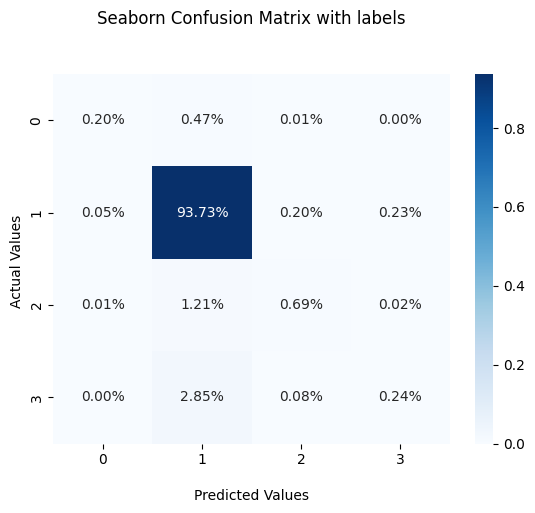

In [56]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

In [59]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.75      0.29      0.42       320
           2       0.95      0.99      0.97     43737
           3       0.70      0.36      0.47       893
           4       0.49      0.08      0.13      1473

    accuracy                           0.95     46423
   macro avg       0.73      0.43      0.50     46423
weighted avg       0.93      0.95      0.93     46423



### Decision Tree Classifier

In [60]:
model = DecisionTreeClassifier()
model.fit(x_train_p, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [61]:
y_pred = model.predict(x_test_p)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[  139   151    20    10]
 [  136 42174   344  1083]
 [   26   380   387   100]
 [   11  1070   117   275]]


In [62]:
print(f"The F1 Score is: {f1_score(y_test, y_pred, average='weighted')}")
print(f"The Accuracy is: {accuracy_score(y_test, y_pred)}")

The F1 Score is: 0.9254983091353761
The Accuracy is: 0.9257264717919996


In [63]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.45      0.43      0.44       320
           2       0.96      0.96      0.96     43737
           3       0.45      0.43      0.44       893
           4       0.19      0.19      0.19      1473

    accuracy                           0.93     46423
   macro avg       0.51      0.50      0.51     46423
weighted avg       0.93      0.93      0.93     46423



### SGD Classifier

In [ ]:
x_train_p = x_train_p.toarray()
x_test_p = x_test_p.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [77]:
model = CategoricalNB()
model.fit(x_train_p, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,min_categories,None


In [81]:
y_pred = model.predict(x_test_p)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[   66   244     9     1]
 [  678 41971   607   481]
 [    2   676   207     8]
 [   22  1230    80   141]]


In [82]:
print(f"The F1 Score is: {f1_score(y_test, y_pred, average='weighted')}")
print(f"The Accuracy is: {accuracy_score(y_test, y_pred)}")

The F1 Score is: 0.9096709730831763
The Accuracy is: 0.9130172543782177


In [83]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.09      0.21      0.12       320
           2       0.95      0.96      0.96     43737
           3       0.23      0.23      0.23       893
           4       0.22      0.10      0.13      1473

    accuracy                           0.91     46423
   macro avg       0.37      0.37      0.36     46423
weighted avg       0.91      0.91      0.91     46423

